In [1]:
import dask.dataframe as dd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
credit_card_balance= dd.read_csv("./data/credit_card_balance.csv")
a = credit_card_balance.shape
print("credit_card_balance shape :({},{})".format( a[0].compute(),a[1]))

credit_card_balance shape :(3840312,23)


In [3]:
credit_card_balance.compute().dtypes.value_counts()

float64    15
int64       7
object      1
dtype: int64

<AxesSubplot:>

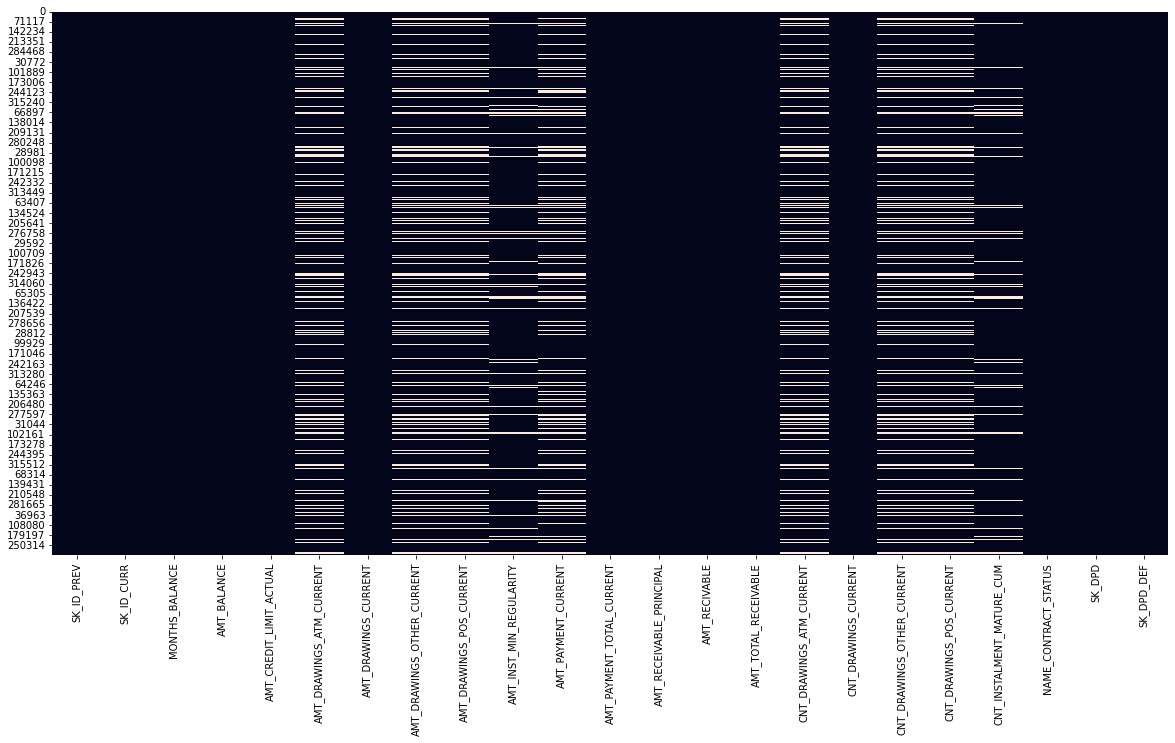

In [9]:
plt.figure(figsize=(20,10))
sns.heatmap(credit_card_balance.isna().compute(), cbar=False)

In [3]:
(credit_card_balance.compute().isna().sum()/credit_card_balance.shape[0].compute()).sort_values(ascending=True)

SK_ID_PREV                    0.000000
NAME_CONTRACT_STATUS          0.000000
CNT_DRAWINGS_CURRENT          0.000000
AMT_TOTAL_RECEIVABLE          0.000000
AMT_RECIVABLE                 0.000000
AMT_RECEIVABLE_PRINCIPAL      0.000000
SK_DPD                        0.000000
AMT_PAYMENT_TOTAL_CURRENT     0.000000
AMT_DRAWINGS_CURRENT          0.000000
AMT_CREDIT_LIMIT_ACTUAL       0.000000
AMT_BALANCE                   0.000000
MONTHS_BALANCE                0.000000
SK_ID_CURR                    0.000000
SK_DPD_DEF                    0.000000
AMT_INST_MIN_REGULARITY       0.079482
CNT_INSTALMENT_MATURE_CUM     0.079482
AMT_DRAWINGS_POS_CURRENT      0.195249
AMT_DRAWINGS_ATM_CURRENT      0.195249
CNT_DRAWINGS_ATM_CURRENT      0.195249
CNT_DRAWINGS_OTHER_CURRENT    0.195249
CNT_DRAWINGS_POS_CURRENT      0.195249
AMT_DRAWINGS_OTHER_CURRENT    0.195249
AMT_PAYMENT_CURRENT           0.199981
dtype: float64

In [10]:
for col in credit_card_balance.compute().select_dtypes('float').columns:
    plt.figure()
    sns.distplot(credit_card_balance[col].compute())

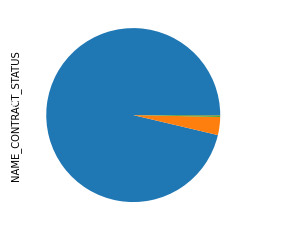

In [8]:
for col in credit_card_balance.compute().select_dtypes('object').columns:
    plt.figure()
    credit_card_balance[col].compute().value_counts().plot.pie(textprops={'color':"w"})

In [5]:
l=list(credit_card_balance.compute().select_dtypes('float').columns) + list(credit_card_balance.compute().select_dtypes('int').columns)

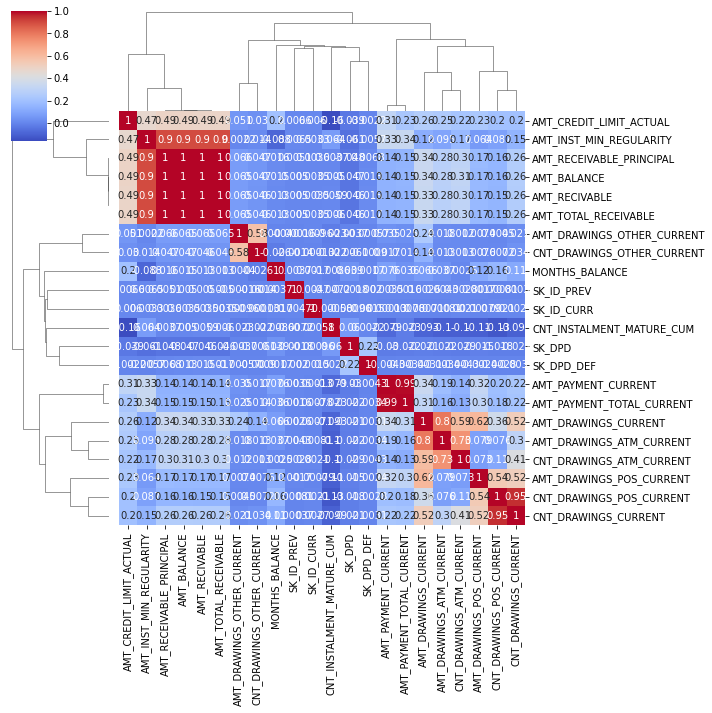

In [6]:
sns.clustermap(credit_card_balance[l].compute().corr(),annot=True,cmap='coolwarm')